Yesterday we established that it is always good to check for multi-collinearity in our features before performing multiple linear regression. 

Run correlations and a scatterplot matrix on the variables mpg, cylinders, displacement, weight, and acceleration. Comment in this thread with which variables you might drop from our list of features.

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep = '\s+',
                 names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 
                     'model_year', 'origin', 'car_name'])

In [49]:
X = df.drop(['mpg' ,'car_name'], axis=1)
X['horsepower'] = pd.to_numeric(df.horsepower, errors = 'coerce')
X.dropna(inplace = True)

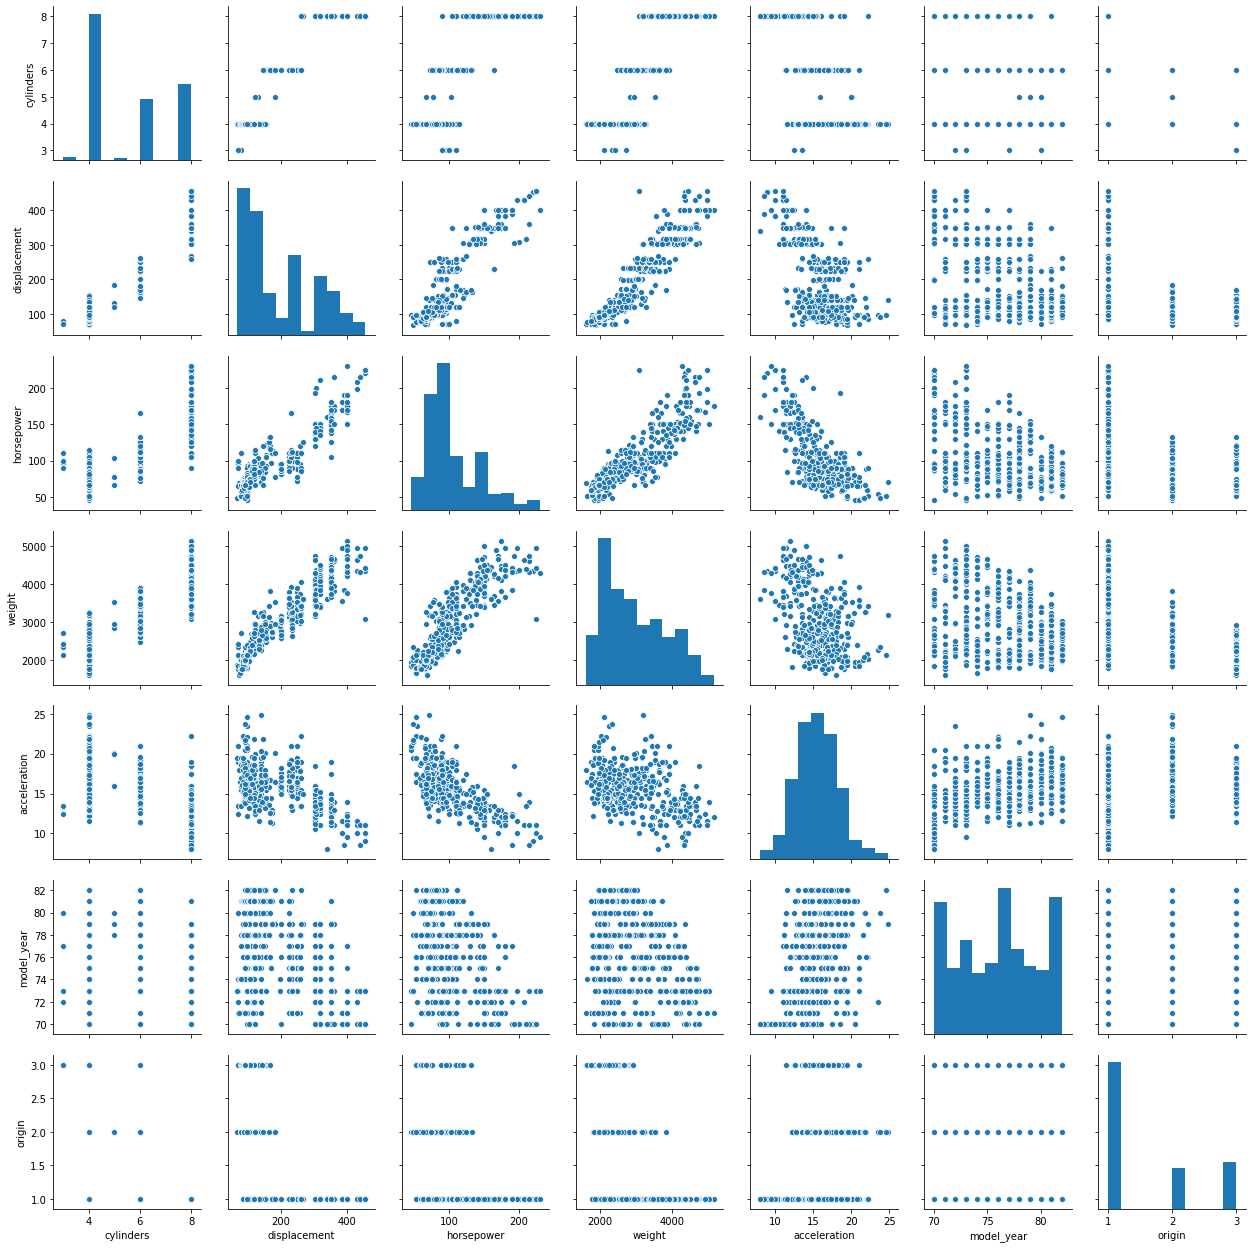

In [60]:
sns.pairplot(X)

In [51]:
print(X.dtypes)
X.isnull().sum()

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
dtype: object


cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [59]:
X.values

array([[  8. , 307. , 130. , ...,  12. ,  70. ,   1. ],
       [  8. , 350. , 165. , ...,  11.5,  70. ,   1. ],
       [  8. , 318. , 150. , ...,  11. ,  70. ,   1. ],
       ...,
       [  4. , 135. ,  84. , ...,  11.6,  82. ,   1. ],
       [  4. , 120. ,  79. , ...,  18.6,  82. ,   1. ],
       [  4. , 119. ,  82. , ...,  19.4,  82. ,   1. ]])

In [58]:
# Check VIF > 10 to measure multicolliniearity of independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function only returns one variable at a time
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('cylinders', 117.70854741316116),
 ('displacement', 96.90976248526793),
 ('horsepower', 67.07215430169944),
 ('weight', 139.45416214259953),
 ('acceleration', 69.69976893381958),
 ('model_year', 115.7946144892812),
 ('origin', 8.469941669334569)]

In [ ]:
# Well they all appear to be > 10....should check this output.

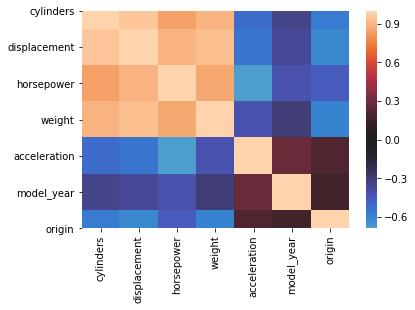

In [63]:
sns.heatmap(X.corr(), center=0);
plt.show()